In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df_copy=df.copy()
# When you do df2 = df, no new DataFrame is created; both df and df2 point to the same data in memory, 
# so changing df2 will also change df.
# To get a truly separate DataFrame that you can modify safely, the usual way is df_copy = df.copy() 
# which makes a new object with its own data.
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#DATA CLEANING

In [4]:
df_copy.shape

(10841, 13)

In [5]:
df_copy[df_copy.duplicated('App')].shape

(1181, 13)

Since this dataset contains 1,181 duplicate rows, we will keep only the first occurrence of each app and drop the rest

In [6]:
# Dropping the duplicates
df_copy=df_copy.drop_duplicates(subset='App', keep='first')

In [7]:
# Dataset without duplicates values
df_copy.shape

(9660, 13)

Now we will look for the missing values

In [8]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating, Type, Content Rating, Current Version, and Android Version contain NaN values, with the Rating column having the highest number of NaN entries.

In [9]:
# Rating column
df_copy['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

<Axes: xlabel='Rating', ylabel='Count'>

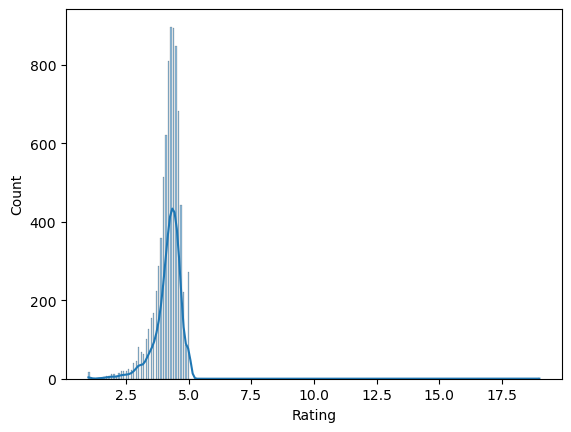

In [10]:
sns.histplot(df_copy['Rating'], kde=True)

As we can see, the rating data is left-skewed and contains outliers, so we will use the median of the Rating column to fill the NaN values.

In [11]:
# Filling the missing values with the median
df_copy['Rating']=df_copy['Rating'].fillna(df_copy['Rating'].median())

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\3713710329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Rating']=df_copy['Rating'].fillna(df_copy['Rating'].median())


In [12]:
df_copy['Rating'].isnull().sum()

np.int64(0)

The missing values in the rating column have been filled.

In [13]:
df_copy['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [14]:
df_copy['Type'].isnull().sum()

np.int64(1)

In [15]:
df_copy[df_copy['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [16]:
df_copy['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

<Axes: xlabel='Type', ylabel='Count'>

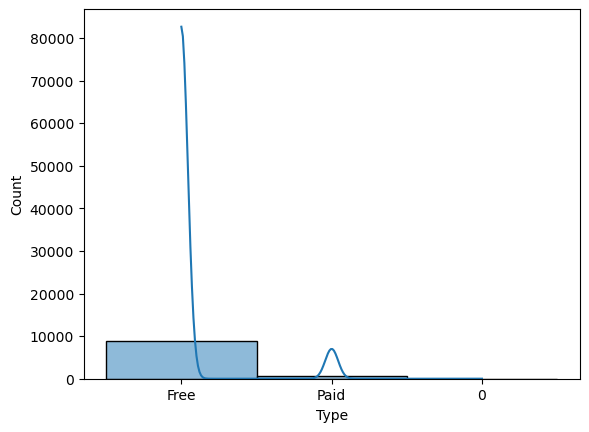

In [17]:
sns.histplot(df_copy['Type'],kde=True)

Filling the missing values in the Type column with the mode of the Type column, i.e., ‘Free’.”

In [18]:
df_copy['Type']=df_copy['Type'].fillna(df_copy['Type'].mode()[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\965757680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Type']=df_copy['Type'].fillna(df_copy['Type'].mode()[0])


In [19]:
df_copy['Type'].isnull().sum()

np.int64(0)

In [20]:
df_copy['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

The missing values in the Type column have been filled.

Content Rating column

In [21]:
# filling the missing value in the content Rating column
df_copy['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

<Axes: xlabel='Content Rating', ylabel='Count'>

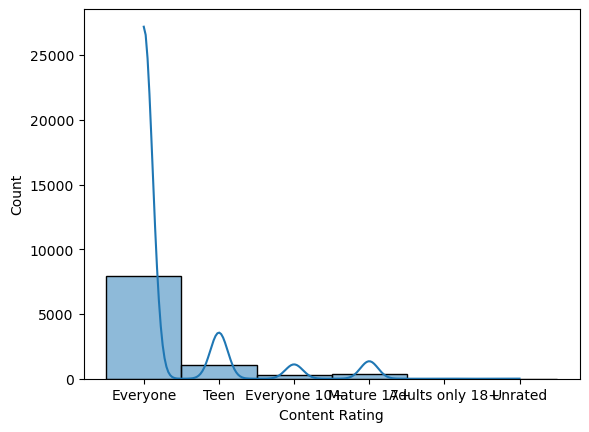

In [22]:
sns.histplot(df_copy['Content Rating'], kde=True)

In [23]:
df_copy['Content Rating'].mode()

0    Everyone
Name: Content Rating, dtype: object

In [24]:
df_copy[df_copy['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
# Filling the missing values of Content Rating column with the mode of the column i.e everyone
df_copy['Content Rating']=df_copy['Content Rating'].fillna(df_copy['Content Rating'].mode()[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\4286519042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Content Rating']=df_copy['Content Rating'].fillna(df_copy['Content Rating'].mode()[0])


In [26]:
df_copy['Content Rating'].isnull().sum()

np.int64(0)

In [27]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

The only columns that still have missing values are "Current Version" and "Android Version."

Current ver column

In [28]:
df_copy['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [29]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
df_copy[df_copy['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [31]:
df_copy['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

We fill this column NAN values with the unknown. As
'Unknown' makes it clear that the version is missing, instead of implying a specific technical behavior like “Varies with device.

In [32]:
# Filling the Nan value of the Current Ver column with the Unknown string

df_copy['Current Ver']=df_copy['Current Ver'].fillna('Unknown')

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\1817426398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Current Ver']=df_copy['Current Ver'].fillna('Unknown')


In [33]:
df_copy['Current Ver'].isnull().sum()

np.int64(0)

Android Ver column

In [34]:
df_copy['Android Ver'].isnull().sum()

np.int64(3)

In [35]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [36]:
df_copy['Android Ver']=df_copy['Android Ver'].str.replace('and up','- 7.1.1')

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\164679336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].str.replace('and up','- 7.1.1')


In [37]:
df_copy['Android Ver'].unique()

array(['4.0.3 - 7.1.1', '4.2 - 7.1.1', '4.4 - 7.1.1', '2.3 - 7.1.1',
       '3.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.1.1', '2.3.3 - 7.1.1',
       'Varies with device', '2.2 - 7.1.1', '5.0 - 7.1.1', '6.0 - 7.1.1',
       '1.6 - 7.1.1', '1.5 - 7.1.1', '2.1 - 7.1.1', '7.0 - 7.1.1',
       '5.1 - 7.1.1', '4.3 - 7.1.1', '2.0 - 7.1.1', '3.2 - 7.1.1',
       '4.4W - 7.1.1', '7.1 - 7.1.1', '8.0 - 7.1.1', '5.0 - 8.0',
       '3.1 - 7.1.1', '2.0.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 - 7.1.1'],
      dtype=object)

In [38]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 - 7.1.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 - 7.1.1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 - 7.1.1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 - 7.1.1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 - 7.1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 - 7.1.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 - 7.1.1
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 - 7.1.1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [39]:
df_copy['Android Ver']=df_copy['Android Ver'].replace('Varies with device',np.nan)

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\361965145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].replace('Varies with device',np.nan)


In [40]:
df_copy['Android Ver'].unique()

array(['4.0.3 - 7.1.1', '4.2 - 7.1.1', '4.4 - 7.1.1', '2.3 - 7.1.1',
       '3.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.1.1', '2.3.3 - 7.1.1', nan,
       '2.2 - 7.1.1', '5.0 - 7.1.1', '6.0 - 7.1.1', '1.6 - 7.1.1',
       '1.5 - 7.1.1', '2.1 - 7.1.1', '7.0 - 7.1.1', '5.1 - 7.1.1',
       '4.3 - 7.1.1', '2.0 - 7.1.1', '3.2 - 7.1.1', '4.4W - 7.1.1',
       '7.1 - 7.1.1', '8.0 - 7.1.1', '5.0 - 8.0', '3.1 - 7.1.1',
       '2.0.1 - 7.1.1', '5.0 - 6.0', '1.0 - 7.1.1'], dtype=object)

In [41]:
df_copy['Android Ver'].mode()

0    4.1 - 7.1.1
Name: Android Ver, dtype: object

In [42]:
# Filling the NAN value with the mode of the column
df_copy['Android Ver']=df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode()[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\372542945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode()[0])


In [43]:
df_copy['Android Ver'].unique()

array(['4.0.3 - 7.1.1', '4.2 - 7.1.1', '4.4 - 7.1.1', '2.3 - 7.1.1',
       '3.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.1.1', '2.3.3 - 7.1.1',
       '2.2 - 7.1.1', '5.0 - 7.1.1', '6.0 - 7.1.1', '1.6 - 7.1.1',
       '1.5 - 7.1.1', '2.1 - 7.1.1', '7.0 - 7.1.1', '5.1 - 7.1.1',
       '4.3 - 7.1.1', '2.0 - 7.1.1', '3.2 - 7.1.1', '4.4W - 7.1.1',
       '7.1 - 7.1.1', '8.0 - 7.1.1', '5.0 - 8.0', '3.1 - 7.1.1',
       '2.0.1 - 7.1.1', '5.0 - 6.0', '1.0 - 7.1.1'], dtype=object)

In [44]:
df_copy['Android Ver']=df_copy['Android Ver'].str.replace('W','')

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\2058413226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].str.replace('W','')


In [45]:
df_copy['Android Ver'].unique()

array(['4.0.3 - 7.1.1', '4.2 - 7.1.1', '4.4 - 7.1.1', '2.3 - 7.1.1',
       '3.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.1.1', '2.3.3 - 7.1.1',
       '2.2 - 7.1.1', '5.0 - 7.1.1', '6.0 - 7.1.1', '1.6 - 7.1.1',
       '1.5 - 7.1.1', '2.1 - 7.1.1', '7.0 - 7.1.1', '5.1 - 7.1.1',
       '4.3 - 7.1.1', '2.0 - 7.1.1', '3.2 - 7.1.1', '7.1 - 7.1.1',
       '8.0 - 7.1.1', '5.0 - 8.0', '3.1 - 7.1.1', '2.0.1 - 7.1.1',
       '5.0 - 6.0', '1.0 - 7.1.1'], dtype=object)

In [46]:
df_copy['Android Ver']=df_copy['Android Ver'].str.split('-').str[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\3379323786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].str.split('-').str[0]


In [47]:
df_copy['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '2.0.1 ', '1.0 '],
      dtype=object)

In [48]:
df_copy['Android Ver']=df_copy['Android Ver'].str.extract(r'(\d+\.\d+)', expand=False)

# The pattern r'(\d+\.\d+)' captures numbers like 4.0, 3.2, 10.1, by matching digits, a dot, then more digits.
# Here, \d+ means “one or more digits”, \. is a literal dot, and the parentheses form a capturing group 
# so str.extract returns just that number (e.g., 4.0 from 4.0.3).
# A plain . is not used because in regex it means “any character”, so \d+.\d+ would also match things 
# like 4x0 or 4-0, not strictly decimal numbers.

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\2386495868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].str.extract(r'(\d+\.\d+)', expand=False)


In [49]:
df_copy['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [50]:
df_copy['Android Ver']=df_copy['Android Ver'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\1839115177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Android Ver']=df_copy['Android Ver'].astype(float)


In [51]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   float64
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Android Ver column is successfully cleaned and converted into float type

In [52]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0


In [53]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

All missing values have been filled

Current Ver column

In [54]:
df_copy['Current Ver'].head(50)

0                  1.0.0
1                  2.0.0
2                  1.2.4
3     Varies with device
4                    1.1
5                    1.0
6                    1.1
7               6.1.61.1
8                  2.9.2
9                    2.8
10                 1.0.4
11                1.0.15
12                   3.8
13                 1.0.4
14                 1.2.3
15               Unknown
16                   3.1
17                   1.0
18                 2.2.5
19                 5.5.4
20                   4.0
21                   1.1
22               2.2.6.2
23                 1.0.0
24                 1.1.3
25                   1.5
26                 1.0.8
27                  1.03
28                   6.0
29                   1.0
30           6.7.12.2018
31                   1.2
32                  2.20
33                 1.1.0
34                   1.6
35                   2.1
36                 1.0.9
37    Varies with device
38                   1.3
39                     1


In [55]:
df_copy['Current Ver'].replace(['Varies with device','Unknown'],np.nan)

0        1.0.0
1        2.0.0
2        1.2.4
3          NaN
4          1.1
         ...  
10836     1.48
10837      1.0
10838      1.0
10839      NaN
10840      NaN
Name: Current Ver, Length: 9660, dtype: object

In [56]:
df_copy['Current Ver'].isnull().sum()

np.int64(0)

In [57]:
df_copy['Current Ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 9660, dtype: object

In [58]:
df_copy['Current Ver']=df_copy['Current Ver'].str.extract(r'(\d+\.\d+)', expand=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\3354724352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Current Ver']=df_copy['Current Ver'].str.extract(r'(\d+\.\d+)', expand=False)


In [59]:
df_copy['Current Ver'].isnull().sum()

np.int64(1254)

In [60]:
df_copy['Current Ver']=df_copy['Current Ver'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_19304\4165848422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Current Ver']=df_copy['Current Ver'].astype(float)


In [65]:
df_copy['Current Ver']

0        1.00
1        2.00
2        1.20
3         NaN
4        1.10
         ... 
10836    1.48
10837    1.00
10838    1.00
10839     NaN
10840     NaN
Name: Current Ver, Length: 9660, dtype: float64

In [61]:
df_copy['Current Ver'].isnull().sum()

np.int64(1254)

<Axes: ylabel='Current Ver'>

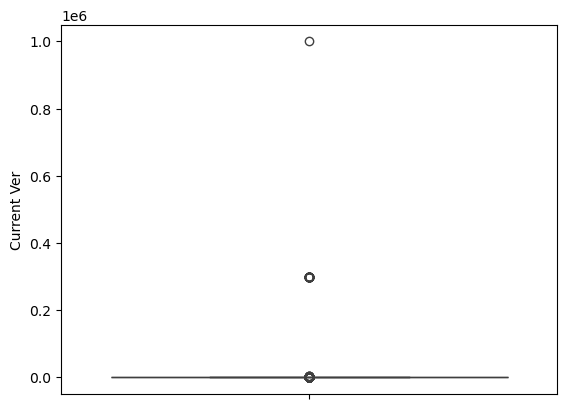

In [ ]:
# Plotting Boxplot to find the outliers in the Current Ver column
sns.boxplot(df_copy['Current Ver'])